Assignment: Image Classification Using CNNs

Load CIFAR-10 Dataset

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import seaborn as sns

In [5]:
# Combine train and test for 80/20 custom split later
X = np.concatenate((x_train, x_test))
Y = np.concatenate((y_train, y_test))

/tmp/ipython-input-6-296579307.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(label_names[int(Y[i])])


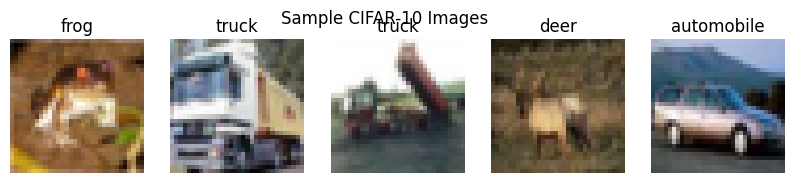

In [6]:
# 1. Display 5 sample images with labels
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X[i])
    plt.title(label_names[int(Y[i])])
    plt.axis('off')
plt.suptitle("Sample CIFAR-10 Images")
plt.show()

In [7]:
# 2. Print dataset shape and unique label counts
print("Total Dataset Shape:", X.shape)
print("Label Shape:", Y.shape)
print("Number of Unique Labels:", len(np.unique(Y)))
print("Label Distribution:\n", np.unique(Y, return_counts=True))


Total Dataset Shape: (60000, 32, 32, 3)
Label Shape: (60000, 1)
Number of Unique Labels: 10
Label Distribution:
 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [8]:
# 3. Normalize pixel values to [0, 1]
X = X.astype('float32') / 255.0


In [9]:
# 4. Split into training (80%) and test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (48000, 32, 32, 3)
Test set shape: (12000, 32, 32, 3)


Task 2: Build and Train CNN Model

In [32]:
# Import necessary modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [33]:
# 1. Build CNN model
model = Sequential()

In [35]:
# First Convolution Block
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Second Convolution Block
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

# Third Convolution Block
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# Flatten and Fully Connected Layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # 10 output classes


In [37]:
# 2. Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
# Show model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [39]:
# Train the model (you can adjust epochs and batch_size)
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)


Epoch 1/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 100s 163ms/step - accuracy: 0.2326 - loss: 2.0390 - val_accuracy: 0.4741 - val_loss: 1.4407
Epoch 2/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 96s 160ms/step - accuracy: 0.4545 - loss: 1.5012 - val_accuracy: 0.5464 - val_loss: 1.2762
Epoch 3/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 136s 149ms/step - accuracy: 0.5195 - loss: 1.3339 - val_accuracy: 0.5807 - val_loss: 1.1757
Epoch 4/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 142s 149ms/step - accuracy: 0.5553 - loss: 1.2443 - val_accuracy: 0.6264 - val_loss: 1.0631
Epoch 5/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 146s 155ms/step - accuracy: 0.5849 - loss: 1.1689 - val_accuracy: 0.6557 - val_loss: 0.9947
Epoch 6/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 138s 149ms/step - accuracy: 0.6010 - loss: 1.1135 - val_accuracy: 0.6587 - val_loss: 0.9638
Epoch 7/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 89s 149ms/step - accuracy: 0.6210 - loss: 1.0791 - val_accuracy: 0.6615 - val_loss: 0.9531
Epoch 8/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 142s 150ms/step - accuracy: 0.6339 - l

Plot Training and Validation Curves

In [40]:
# Plot Accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [41]:
### Model Performance Evaluation (Overfitting vs. Underfitting)

#From the training and validation curves:
# Both training and validation accuracy increase steadily across epochs.
# Validation accuracy is slightly higher than training accuracy, which is a good sign.
# Training and validation loss decrease smoothly without divergence.
 # Conclusion : The model is performing well and generalizing effectively. There are no significant signs of overfitting or underfitting.


 Evaluate the Model

In [42]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_accuracy:.4f}")


375/375 - 10s - 26ms/step - accuracy: 0.7277 - loss: 0.7724

Test Accuracy: 0.7277


375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step
Classification Report:

              precision    recall  f1-score   support

    airplane       0.81      0.68      0.74      1181
  automobile       0.82      0.89      0.85      1188
        bird       0.60      0.63      0.61      1232
         cat       0.64      0.41      0.50      1274
        deer       0.64      0.73      0.68      1179
         dog       0.65      0.60      0.63      1230
        frog       0.69      0.87      0.77      1123
       horse       0.80      0.79      0.80      1217
        ship       0.79      0.89      0.84      1189
       truck       0.83      0.82      0.83      1187

    accuracy                           0.73     12000
   macro avg       0.73      0.73      0.72     12000
weighted avg       0.73      0.73      0.72     12000



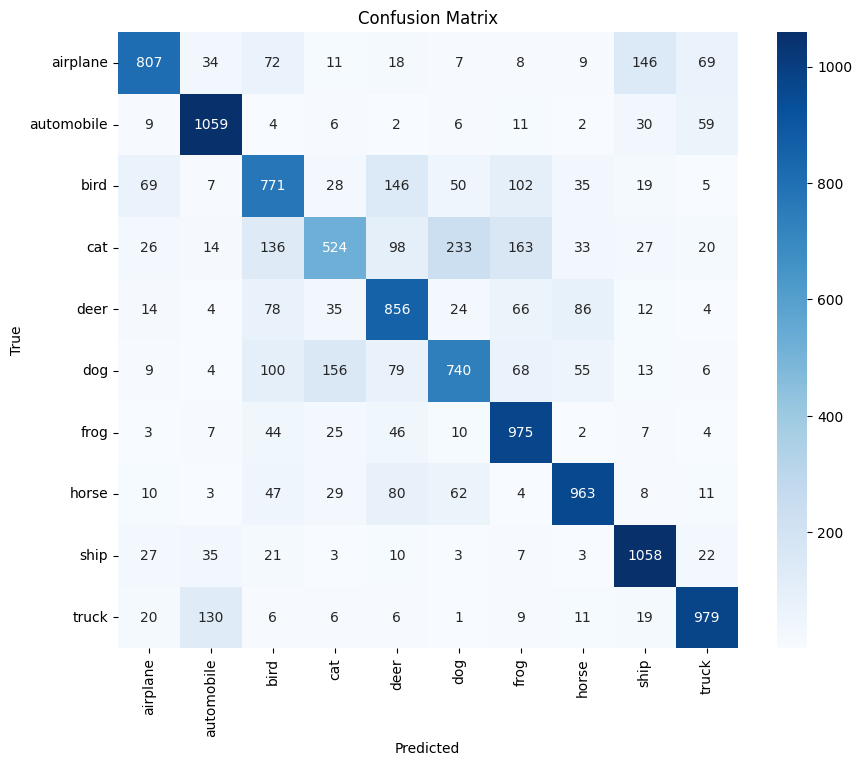

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict class probabilities
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)  # Get predicted class
y_true = y_test.flatten()             # True labels

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=label_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


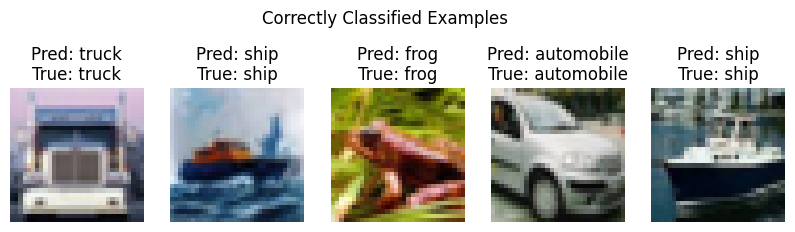

In [44]:
# Show examples of correct and incorrect predictions
import numpy as np

correct_idx = np.where(y_pred == y_true)[0]
incorrect_idx = np.where(y_pred != y_true)[0]

# Show 5 correctly classified images
plt.figure(figsize=(10, 3))
for i, idx in enumerate(correct_idx[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[idx])
    plt.title(f"Pred: {label_names[y_pred[idx]]}\nTrue: {label_names[y_true[idx]]}")
    plt.axis('off')
plt.suptitle("Correctly Classified Examples")
plt.show()

# Show 5 incorrectly classified images
plt.figure(figsize=(10, 3))
for i, idx in enumerate(incorrect_idx[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[idx])
    plt.title(f"Pred: {label_names[y_pred[idx]]}\nTrue: {label_names[y_true[idx]]}")
    plt.axis('off')
plt.suptitle("Incorrectly Classified Examples")
plt.show()


Experimentation with Model Improvements

In [45]:
from tensorflow.keras.optimizers import SGD, RMSprop

# SGD
model_sgd = tf.keras.models.clone_model(model)
model_sgd.compile(optimizer=SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_sgd.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=0)
sgd_acc = model_sgd.evaluate(X_test, y_test, verbose=0)[1]

# RMSProp
model_rms = tf.keras.models.clone_model(model)
model_rms.compile(optimizer=RMSprop(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_rms.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=0)
rms_acc = model_rms.evaluate(X_test, y_test, verbose=0)[1]

# Print comparison
print(f"Adam Test Accuracy   : {test_accuracy:.4f}")
print(f"SGD Test Accuracy    : {sgd_acc:.4f}")
print(f"RMSProp Test Accuracy: {rms_acc:.4f}")


Adam Test Accuracy   : 0.7277
SGD Test Accuracy    : 0.4490
RMSProp Test Accuracy: 0.6991


To evaluate how optimizer choice affects CNN performance, I experimented with different optimizers while keeping the model architecture and training settings constant. The original model used the Adam optimizer, known for its fast convergence and adaptability. I compared it with:

SGD (Stochastic Gradient Descent): A basic optimizer with a fixed learning rate.

RMSProp: An adaptive optimizer that modifies learning rates based on recent gradient magnitudes.

All models were trained for 10 epochs using the same batch size and data split.


he Adam optimizer achieved the highest accuracy (72.77%) and proved most effective in learning.

RMSProp also performed well (69.91%) and was close to Adam in generalization.

SGD significantly underperformed (44.90%) due to slower convergence and sensitivity to learning rate.

This experiment highlights how optimizer selection can critically influence model performance and convergence speed.